In [1]:
import numpy as np
import pandas as pd

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [2]:
def plot_bar(quantidade, label):
    
    ind = np.arange(len(quantidade))
    width = 0.8
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, quantidade, width, color='b')
    
    ax.set_ylabel('Quantidade')
    ax.set_title('Gráfico de barras')
    ax.set_xticks(ind)
    ax.set_xticklabels(label)
    
    ax.legend()
    plt.show()

# plot_bar([5,3,4], ["x1","x2","x3"])

In [3]:
# read train
train = pd.read_csv('train.csv'#, sep=',', nrows=1000
                   ) # nrows = ler as n primeiras linhas do arquivo

In [4]:
#read members
member = pd.read_csv('members.csv')

In [5]:
# read songs
song = pd.read_csv('songs.csv'#, nrows=1000000
                  )

In [6]:
song_extra = pd.read_csv('song_extra_info.csv'#, nrows=1000000
                  )

In [7]:
sample = pd.read_csv('sample_submission.csv')

In [8]:
ds = sample.id.unique()
print (ds)

[      0       1       2 ..., 2556787 2556788 2556789]


In [9]:
columns_member = member.columns.tolist()
columns_train = train.columns.tolist()
columns_song = song.columns.tolist()
columns_song_extra = song_extra.columns.tolist()
print (columns_member)
print (columns_train)
print (columns_song)
print (columns_song_extra)

['msno', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date']
['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target']
['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
['song_id', 'name', 'isrc']


In [10]:

tt = train.merge(member[columns_member], on='msno', how='left')
tt = tt.merge(song[columns_song], on='song_id', how='left')
tt = tt.merge(song_extra[columns_song_extra], on='song_id', how='left')
tt

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,247803.0,1259,Desiigner,Sidney Selby| Adnan Khan,NaN,52.0,Panda,USUM71601094
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,TEDDY| TAEYANG,31.0,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,181115.0,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,NaN,52.0,Star Of The Show,USLXJ1607334
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1,15,26,male,9,20111107,20180304,278964.0,2022,OneRepublic,Ryan Tedder,NaN,52.0,Dreaming Out Loud,USUM70759544
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1,15,26,male,9,20111107,20180304,257369.0,465,OneRepublic,Ryan Tedder,NaN,52.0,Counting Stars,USUM71301306


### Ananlise da quantidade de dados nulos por coluna

0 msno
0 song_id
24849 source_system_tab
414804 source_screen_name
21539 source_type
0 target
0 city
0

/home/CIN/jcd2/Documents/env/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


 bd
2961479 gender
0 registered_via
0 registration_init_time
0 expiration_date
114 song_length
118455 genre_ids
114 artist_name
1675706 composer
3178797 lyricist
150 language
1457 name
577858 isrc


<IPython.core.display.Javascript object>


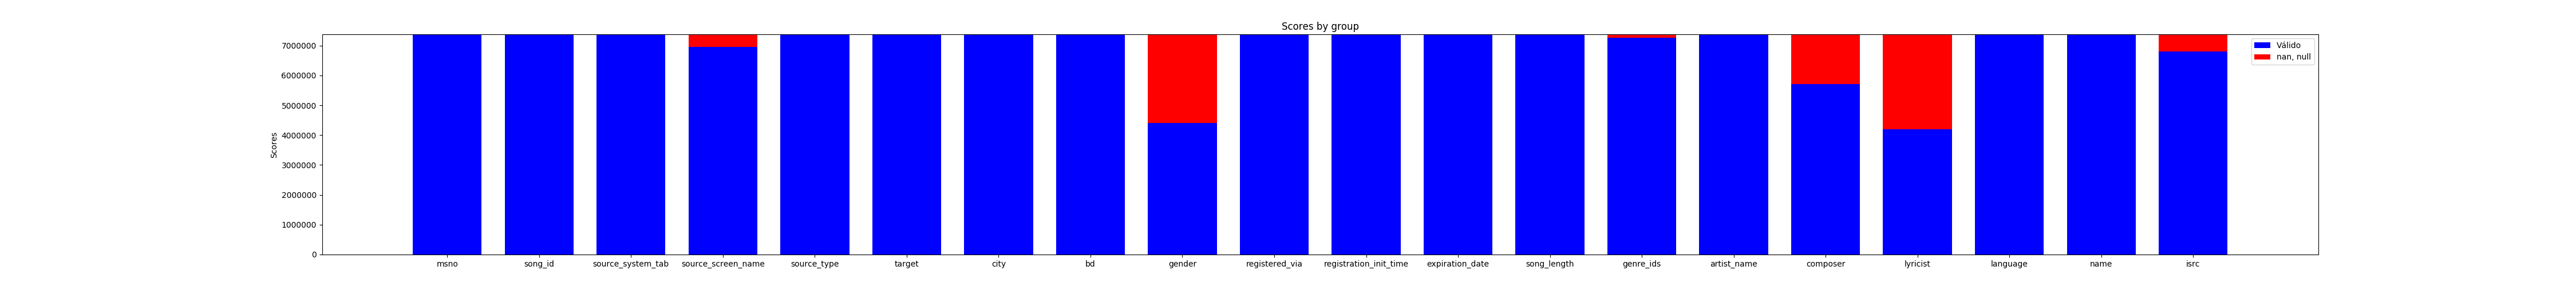

In [73]:
true = []
false = []
labels = []

for i in tt.columns.tolist():
    vazio = tt[tt[i].isnull() | tt[i].isin(['null'])]
    true.append(len(tt)-len(vazio))
    false.append(len(vazio))
    labels.append(i)
    print (len(vazio), i)

ind = np.arange(len(true)) 
width = 0.75 

fig, ax = plt.subplots(figsize=(45, 5))

p1 = ax.bar(ind, tuple(true), width, color='blue')
p2 = ax.bar(ind, tuple(false), width,
             bottom=true, color='red')

ax.set_ylabel('Scores')
ax.set_title('Scores by group')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend((p1[0], p2[0]), ('Válido', 'nan, null'))

plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# tt.columns.tolist()

columns_train = [
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'city',
 'bd',
 'gender',
 'registered_via',
 'registration_init_time',
 'expiration_date',
 'song_length',
 'language']

dftrain = tt.reindex(columns=columns_train)
dftrain
# X = tt.drop(['target', 'isrc'], axis=1)
# y = tt['target'].values

# dummies = pd.get_dummies(dftrain.gender)
# dummies
# est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')
# est.fit(X[5000:100000], y[5000:100000])
# print ("aqui")
# pred = est.predict(x[:5000])
# pred

,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,language
0,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,206471.0,52.0
1,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,284584.0,52.0
2,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,225396.0,52.0
3,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,255512.0,-1.0
4,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,187802.0,52.0
5,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,247803.0,52.0
6,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,229982.0,31.0
7,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,181115.0,52.0
8,my library,Local playlist more,local-library,15,26,male,9,20111107,20180304,278964.0,52.0
9,my library,Local playlist more,local-library,15,26,male,9,20111107,20180304,257369.0,52.0


In [14]:
columns_tt = tt.columns.tolist()
for i in columns_tt:
    cc = list(tt[i].unique())
    print (i, "==>" , len(cc), type(cc[0]) , "\n")

msno ==> 30755 <class 'str'> 

song_id ==> 359966 <class 'str'> 

source_system_tab ==> 10 <class 'str'> 

source_screen_name ==> 21 <class 'str'> 

source_type ==> 13 <class 'str'> 

target ==> 2 <class 'numpy.int64'> 

city ==> 21 <class 'numpy.int64'> 

bd ==> 92 <class 'numpy.int64'> 

gender ==> 3 <class 'float'> 

registered_via ==> 5 <class 'numpy.int64'> 

registration_init_time ==> 3811 <class 'numpy.int64'> 

expiration_date ==> 1395 <class 'numpy.int64'> 

song_length ==> 60267 <class 'numpy.float64'> 

genre_ids ==> 573 <class 'str'> 

artist_name ==> 40583 <class 'str'> 

composer ==> 76065 <class 'str'> 

lyricist ==> 33890 <class 'float'> 

language ==> 11 <class 'numpy.float64'> 

name ==> 234145 <class 'str'> 

isrc ==> 269761 <class 'str'> 



In [38]:
columns_dftrain = [
 'source_system_tab',
 'source_screen_name',
 'source_type',
 'city',
 'bd',
 'gender',
 'registered_via',
 'registration_init_time',
 'expiration_date',
 'song_length',
 'language',
 'isrc',
 'target']

dftrain = tt.reindex(columns=columns_dftrain)
dftrain

,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,language,isrc,target
0,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,206471.0,52.0,GBUM71602854,1
1,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,284584.0,52.0,US3C69910183,1
2,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,225396.0,52.0,USUM70618761,1
3,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,255512.0,-1.0,GBUQH1000063,1
4,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,187802.0,52.0,QM3E21606003,1
5,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,247803.0,52.0,USUM71601094,1
6,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,229982.0,31.0,TWA531400512,1
7,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,181115.0,52.0,USLXJ1607334,1
8,my library,Local playlist more,local-library,15,26,male,9,20111107,20180304,278964.0,52.0,USUM70759544,1
9,my library,Local playlist more,local-library,15,26,male,9,20111107,20180304,257369.0,52.0,USUM71301306,1


In [ ]:
# str columns
str_columns = ['source_system_tab', 'source_screen_name', 'source_type', 'gender']
for i in str_columns:
    print (i)
    dummies = pd.get_dummies(dftrain[i], prefix=i)
    dftrain = pd.concat([dftrain,dummies], axis=1)
dftrain
# dummies = pd.get_dummies(dftrain['gender'], prefix='gender')
# dftttrain = pd.concat([dftrain, dummies], axis=1)
# # dftrain.join(dummies)
# dftttrain

source_system_tab
source_screen_name
source_type
gender


,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,...,source_type_local-playlist,source_type_my-daily-playlist,source_type_online-playlist,source_type_radio,source_type_song,source_type_song-based-playlist,source_type_top-hits-for-artist,source_type_topic-article-playlist,gender_female,gender_male
0,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,206471.0,...,0,0,1,0,0,0,0,0,0,0
1,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,284584.0,...,1,0,0,0,0,0,0,0,1,0
2,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,225396.0,...,1,0,0,0,0,0,0,0,1,0
3,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,255512.0,...,1,0,0,0,0,0,0,0,1,0
4,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,187802.0,...,0,0,1,0,0,0,0,0,0,0
5,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,247803.0,...,0,0,1,0,0,0,0,0,0,0
6,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,229982.0,...,1,0,0,0,0,0,0,0,1,0
7,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,181115.0,...,0,0,1,0,0,0,0,0,0,0
8,my library,Local playlist more,local-library,15,26,male,9,20111107,20180304,278964.0,...,0,0,0,0,0,0,0,0,0,1
9,my library,Local playlist more,local-library,15,26,male,9,20111107,20180304,257369.0,...,0,0,0,0,0,0,0,0,0,1


### Removendo colunas que foram feito dummies do dataframe

In [1]:
dftrain.drop(str_columns, axis=1, inplace=True)
dftrain

NameError: name 'dftrain' is not defined

### Tratando a coluna isrc

In [ ]:
isrc_values = pd.Series(dftrain.isrc.values)
dftrain.drop(['isrc'], axis=1, inplace=True)
# isrc_column = dftrain.reindex(columns=['isrc'])

# isrc_column['cc'] = isrc_values.str.slice(0,2)  # Country Code column
# isrc_column['xxx'] = isrc_values.str.slice(2,5) # IRSC Issuer
dftrain['isrc'] = isrc_values.str.slice(5,7).astype(float)  # IRSC issue date
dftrain

ajustes na coluna de ano

In [ ]:
dftrain.loc[dftrain['isrc'] > 17, 'isrc'] += 1900  # 1900's songs
dftrain.loc[dftrain['isrc'] < 18, 'isrc'] += 2000  # 2000's songs

dftrain

In [33]:
columns_isrc = isrc_column.columns.tolist()
for i in columns_isrc:
    cc = list(isrc_column[i].unique())
    print (i, "==>" , len(cc), type(cc[0]) , "\n")

isrc ==> 269761 <class 'str'> 

cc ==> 110 <class 'str'> 

xxx ==> 6456 <class 'str'> 

yyyy ==> 101 <class 'numpy.float64'> 



junstando com a base de trainamento

In [37]:
dftrain.drop(['isrc'], axis=1, inplace=True) # removendo a coluna isrc de dftrain
dftrain = pd.concat([dftrain,isrc_column], axis=1)
dftrain

,city,bd,registered_via,registration_init_time,expiration_date,song_length,language,source_system_tab_discover,source_system_tab_explore,source_system_tab_listen with,...,source_type_my-daily-playlist,source_type_online-playlist,source_type_radio,source_type_song,source_type_song-based-playlist,source_type_top-hits-for-artist,source_type_topic-article-playlist,gender_female,gender_male,yyyy
0,1,0,7,20120102,20171005,206471.0,52.0,0,1,0,...,0,1,0,0,0,0,0,0,0,2016.0
1,13,24,9,20110525,20170911,284584.0,52.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1999.0
2,13,24,9,20110525,20170911,225396.0,52.0,0,0,0,...,0,0,0,0,0,0,0,1,0,2006.0
3,13,24,9,20110525,20170911,255512.0,-1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,2010.0
4,1,0,7,20120102,20171005,187802.0,52.0,0,1,0,...,0,1,0,0,0,0,0,0,0,2016.0
5,1,0,7,20120102,20171005,247803.0,52.0,0,1,0,...,0,1,0,0,0,0,0,0,0,2016.0
6,13,24,9,20110525,20170911,229982.0,31.0,0,0,0,...,0,0,0,0,0,0,0,1,0,2014.0
7,1,0,7,20120102,20171005,181115.0,52.0,0,1,0,...,0,1,0,0,0,0,0,0,0,2016.0
8,15,26,9,20111107,20180304,278964.0,52.0,0,0,0,...,0,0,0,0,0,0,0,0,1,2007.0
9,15,26,9,20111107,20180304,257369.0,52.0,0,0,0,...,0,0,0,0,0,0,0,0,1,2013.0


[258, 831, 7, 14, 11, 2, 15, 33, 3, 4, 244, 118, 635, 37, 344, 424, 302, 8] ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']

 [nan '1259' '1011' '465' '2022' '465|458' '458' '1609' '921' '451' '437'
 '465|1259' '444' '921|458' '958' '359' '829' '921|465' '691' '880|458'
 '1616|1609' '1616' '139|125|109' '465|430' '1152|829' '139' '947' '2157'
 '940' '786|726' '2122' '458|1287' '786|947' '465|1011'
 '864|850|726|857|843' '786' '726']
190 nan
14 1259
4 1011
437 465
17 2022
3 465|458
183 458
32 1609
23 921
6 451
2 437
4 465|1259
24 444
2 921|458
4 958
16 359
2 829
1 921|465
1 691
1 880|458
1 1616|1609
2 1616
1 139|125|109
1 465|430
1 1152|829
3 139
5 947
2 2157
4 940
1 786|726
1 2122
1 458|1287
2 786|947
2 465|1011
1 864|850|726|857|843
3 786
3 726


<IPython.core.display.Javascript object>


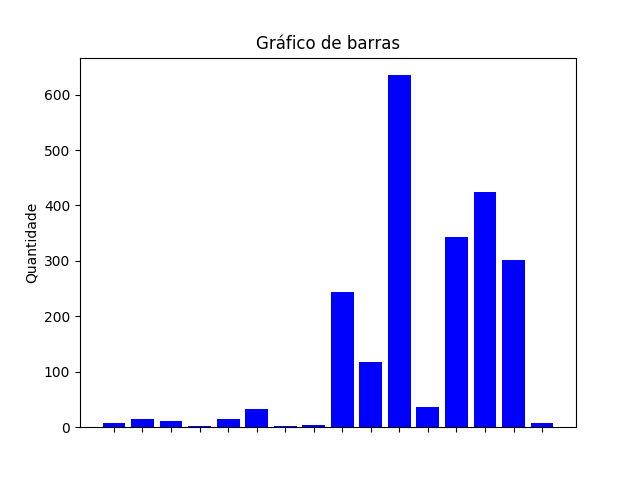

In [37]:
columns = tt.columns.tolist()
# print (columns)
dd = tt.reindex(columns=columns)
# dd.plot.bar(x="XA", y="BA")
# print (len(dd.msno.unique()))
# print (len(dd.song_id.unique()))
datas = []
labels = []
for column in columns:
    datas.append(len(dd[column].unique()))
    labels.append(column)
    
print (datas, labels)
print ("\n", dd.genre_ids.unique())
for i in dd.genre_ids.unique():
    print (len(dd[dd.genre_ids.isin([i])]), i)
plot_bar(datas[2:], labels[2:0])

In [62]:
def source_system_tab(data_frame):
    """
    recebe o data_frame da base de dados e retorna o data frame retirando as 
    linhas que tem valores nulos  na coluna source_system_tab
    """
    df = data_frame[pd.notnull(data_frame.source_system_tab)]
    df = df[~df.source_system_tab.isin(["null"])]
    return df
for i in df.source_system_tab.unique():
    print (i, len(df[df.source_system_tab.isin([i])]))

explore 755
my library 34785
search 1737
discover 9824
radio 1787
listen with 920
notification 19
settings 41


In [15]:
tt.describe()

,target,city,bd,registered_via,registration_init_time,expiration_date
count,10.0,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01
mean,1.0,8.600000,14.800000,8.200000,2.011447e+07,2.017283e+07
std,0.0,6.586181,12.761052,1.032796,4.850536e+03,3.940869e+03
min,1.0,1.000000,0.000000,7.000000,2.011052e+07,2.017091e+07
25%,1.0,1.000000,0.000000,7.000000,2.011052e+07,2.017091e+07
50%,1.0,13.000000,24.000000,9.000000,2.011111e+07,2.017100e+07
75%,1.0,13.000000,24.000000,9.000000,2.012010e+07,2.017100e+07
max,1.0,15.000000,26.000000,9.000000,2.012010e+07,2.018030e+07


In [ ]:
columns = data_set.columns.tolist()[:-1]
data_set.drop_duplicates(subset=columns, keep='first', inplace=True) 

In [ ]:
data_set.describe()

In [45]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.neural_network import MLPRegressor

print('Loading data...')
data_path = './'
train = pd.read_csv(data_path + 'train.csv', nrows=50000, dtype={'msno' : 'category',
                                                'source_system_tab' : 'category',
                                                  'source_screen_name' : 'category',
                                                  'source_type' : 'category',
                                                  'target' : np.uint8,
                                                  'song_id' : 'category'})
test = pd.read_csv(data_path + 'test.csv', nrows=50000, dtype={'msno' : 'category',
                                                'source_system_tab' : 'category',
                                                'source_screen_name' : 'category',
                                                'source_type' : 'category',
                                                'song_id' : 'category'})
songs = pd.read_csv(data_path + 'songs.csv', nrows=50000, dtype={'genre_ids': 'category',
                                                  'language' : 'category',
                                                  'artist_name' : 'category',
                                                  'composer' : 'category',
                                                  'lyricist' : 'category',
                                                  'song_id' : 'category'})
members = pd.read_csv(data_path + 'members.csv',dtype={'city' : 'category',
                                                      'bd' : np.uint8,
                                                      'gender' : 'category',
                                                      'registered_via' : 'category'})
songs_extra = pd.read_csv(data_path + 'song_extra_info.csv', nrows=50000)

print('Data preprocessing...')
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

def isrc_to_year(isrc):
    if type(isrc) == str:
        if int(isrc[5:7]) > 17:
            return 1900 + int(isrc[5:7])
        else:
            return 2000 + int(isrc[5:7])
    else:
        return np.nan
        
songs_extra['song_year'] = songs_extra['isrc'].apply(isrc_to_year)
songs_extra.drop(['isrc', 'name'], axis = 1, inplace = True)

train = train.merge(members, on='msno', how='left')
test = test.merge(members, on='msno', how='left')

train = train.merge(songs_extra, on = 'song_id', how = 'left')
test = test.merge(songs_extra, on = 'song_id', how = 'left')

import gc
del members, songs; gc.collect();

for col in train.columns:
    if train[col].dtype == object:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

X = train.drop(['target'], axis=1)
y = train['target'].values

print (X)
X_test = test.drop(['id'], axis=1)
ids = test['id'].values


mlp = MLPRegressor(hidden_layer_sizes=(3), activation='relu', verbose=True)
mlp.fit(X, y)

p_test = mlp.predict(X_test)

"""
del train, test; gc.collect();

d_train = lgb.Dataset(X, y)
watchlist = [d_train]

#Those parameters are almost out of hat, so feel free to play with them. I can tell
#you, that if you do it right, you will get better results for sure ;)
print('Training LGBM model...')
params = {}
params['learning_rate'] = 0.2
params['application'] = 'binary'
params['max_depth'] = 8
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

print (d_train)

model = lgb.train(params, train_set=d_train, num_boost_round=50, valid_sets=watchlist, \
verbose_eval=5)

print('Making predictions and saving them...')
p_test = model.predict(X_test)
"""
subm = pd.DataFrame()
subm['id'] = ids
subm['target'] = p_test
subm.to_csv('submissio.csv.gz', compression = 'gzip', index=False, float_format = '%.5f')
print('Done!')

Loading data...
Data preprocessing...
                                               msno  \
0      FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1      Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2      Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3      Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4      FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
5      FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
6      Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
7      FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
8      uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
9      uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
10     uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
11     uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=   
12     TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=   
13     3g0bC24RD7QUeALY1IF/e8L6X3fHG298ZFIsCEG9T9Y=   
14     TJU0Gfvy7FB+r89bWovPKXTjuApTCiv3xg/tt5shR78=   
15     3g0bC24RD7QUeALY1IF/e8L6X3fHG298ZFIsCEG9T9Y=   
16     TJU0Gfvy7FB+r89bWovP

ValueError: could not convert string to float: 'male'

[[ 0.37490954 -1.050063   -1.23554422]
 [-1.80573437  1.4629797   0.55986026]
 [ 0.18060339 -0.19408204 -0.44291678]
 ..., 
 [ 1.36973585 -0.66276561 -2.58657527]
 [-0.06408818  0.07937849  1.22044476]
 [-1.37219699  0.55787221  0.53758356]]


<IPython.core.display.Javascript object>


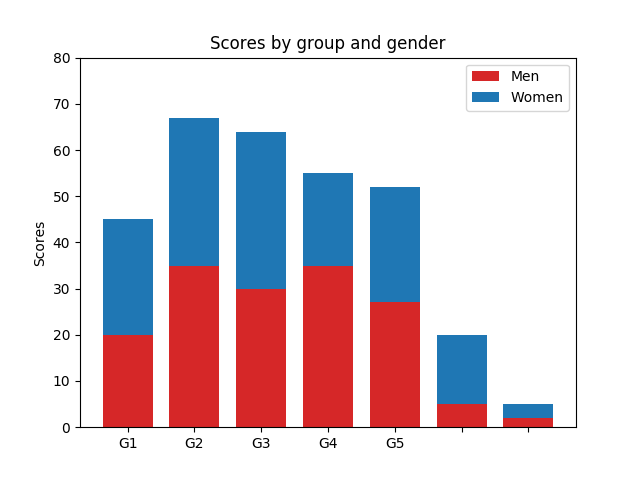

In [57]:
x = np.random.randn(1000, 3)
print (x)
# fig, axes = plt.subplots()

colors = ['red', 'blue', 'green']
N = 7
menMeans = [20, 35, 30, 35, 27,5,2]
womenMeans = [25, 32, 34, 20, 25,15,3]
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.75       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, tuple(menMeans), width, color='#d62728'#, yerr=menStd
            )
p2 = plt.bar(ind, tuple(womenMeans), width,
             bottom=menMeans#, yerr=womenStd
            )

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ['G1', 'G2', 'G3', 'G4', 'G5'])
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()